In [3]:
from __future__ import annotations

In [4]:
from config.dl_model_config import DLModelConfig

from ipsqt.prediction.dl.dl_predictor import DLClassifier
from ipsqt.prediction.dl.models.mlp import MLPClassifier
from ipsqt.strategies.predicted.binary_position_strategy import BinaryPositionStrategy

from run import initialize

In [5]:
REBAL_FREQ = "D"
STRATEGY = BinaryPositionStrategy
MODEL = MLPClassifier
RETRAIN = False

SAVE = True

In [6]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.n_features = len(runner.available_features)
model_config.n_classes = 2

predictor = DLClassifier(
    model_cls=MODEL,
    model_config=model_config,
    verbose=False,
)

strategy = STRATEGY(
    predictor=predictor,
    retrain=RETRAIN,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 2013-03-24 00:00:00 to 2024-05-05 00:00:00
Num Train Iterations: 581
Num OOS Daily Points: 581


In [7]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights: 100%|██████████| 581/581 [00:01<00:00, 318.29it/s]


In [8]:
result

StrategyStatistics:
* final_nav = 1.067089
* geom_avg_total_r = 0.005829
* geom_avg_xs_r = -0.007805
* std_xs_r = 0.054960
* min_xs_r = -0.059261
* max_xs_r = 0.065110
* skew = -0.345725
* kurtosis = 22.814595
* max_dd = -0.256766
* sharpe = -0.142016
* alpha_buy_hold = -0.135782
* tracking_error_buy_hold = 0.154025
* ir_buy_hold = -0.881557
* factor_loadings = {'_MKT': 0.11315015004051596}
* alpha_benchmark = -0.022941
* alpha_benchmark_pvalue = 0.173975
* tracking_error_benchmark = 0.051698
* ir_benchmark = -0.443757
* ttest_pval = 0.996332
* levene_pval = 0.000000
* timing_ability_coef = -0.007071
* timing_ability_pval = 0.846960

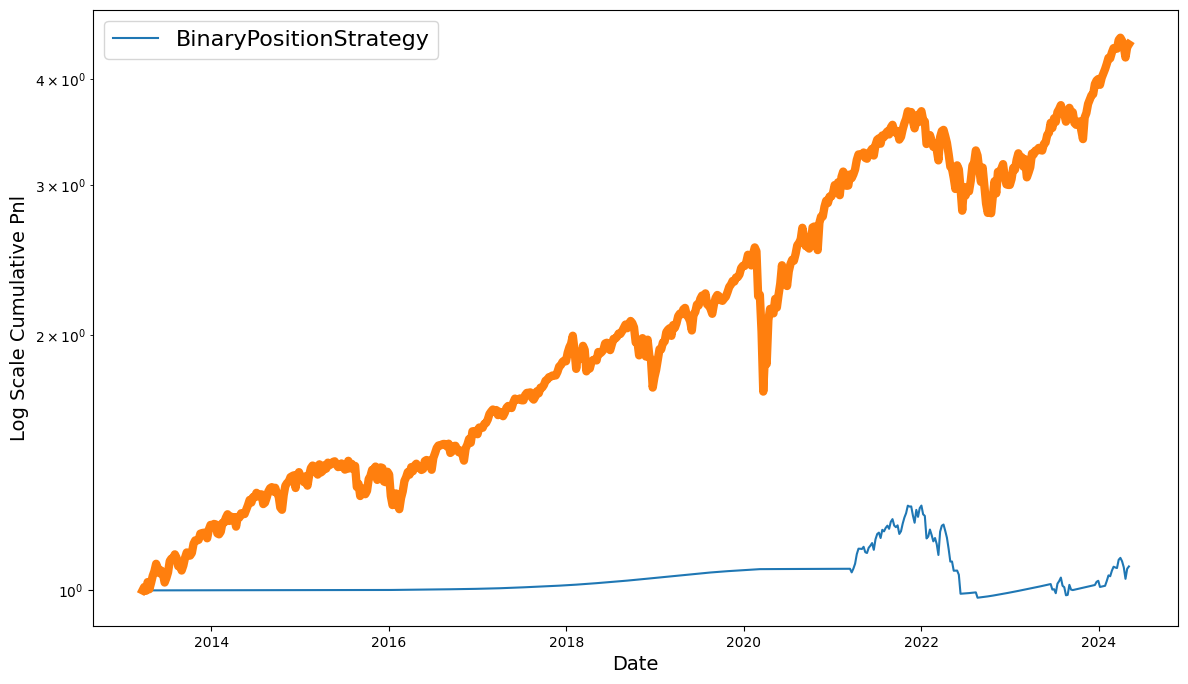

In [9]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

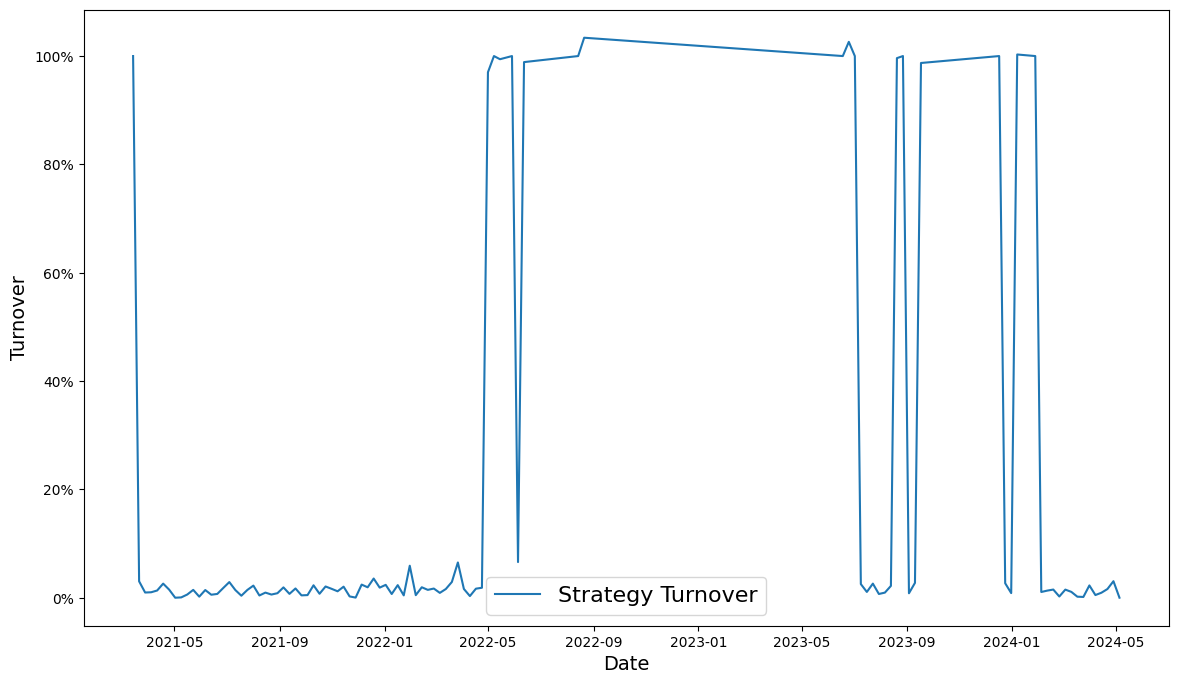

In [10]:
runner.plot_turnover()

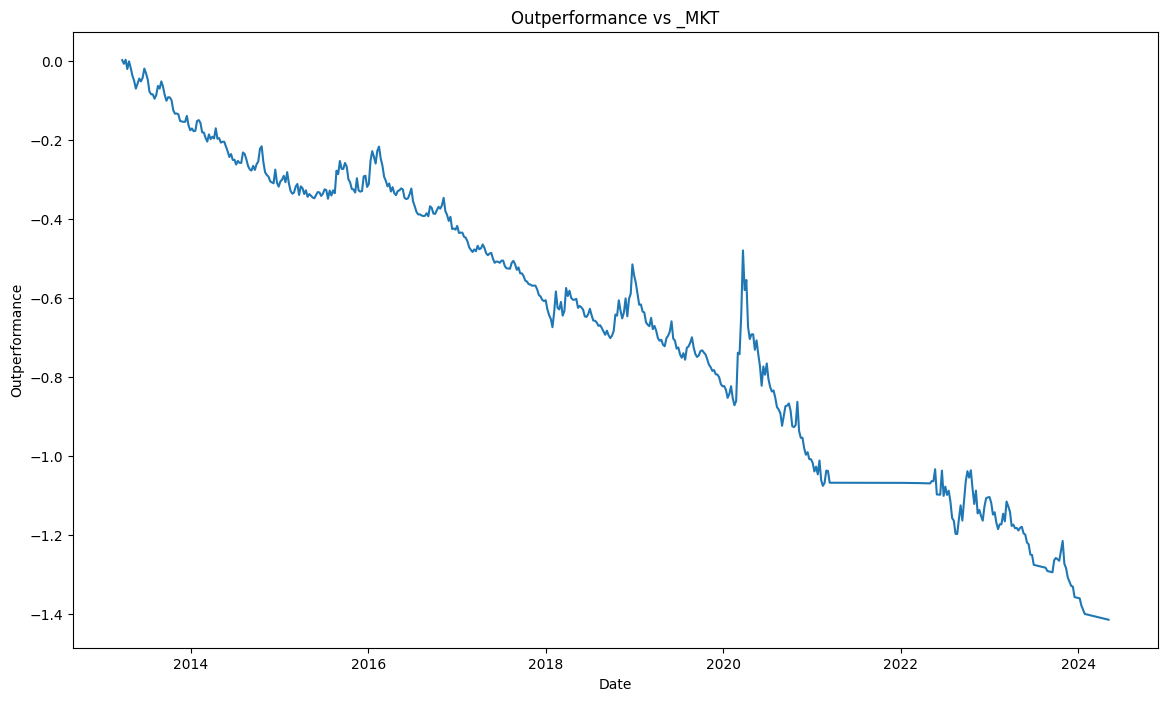

In [11]:
runner.plot_outperformance(mkt_only=True)

In [12]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

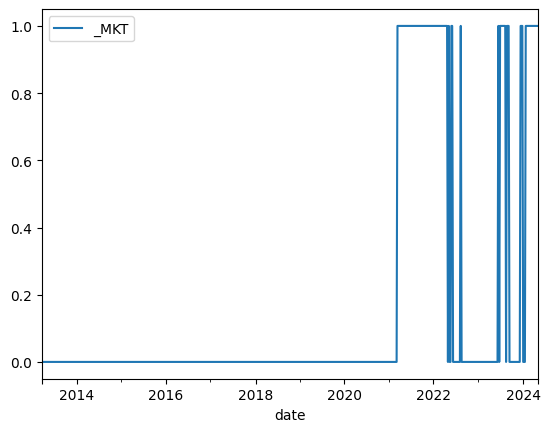

In [14]:
runner.strategy_weights.plot();